In [1]:
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = (14, 8)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [20]:

# reading the Dataset
data = pd.read_csv('datasets/review.csv')

# lets print the shape of the dataset
print("The Shape of the Dataset :", data.shape)

The Shape of the Dataset : (96, 6)


In [21]:
# lets check the head of the dataset
data.head()

AttributeError: 'Index' object has no attribute '_format_flat'

   Unique ID       Remedi Name       Diseases Name  \
0           1      Tea Tree Oil  fungal infections   
1           2       Oregano Oil  fungal infections   
2           3          Turmeric  fungal infections   
3           4          Neem Oil  fungal infections   
4           5  Hot Honey Water             allergy   

                                              Review  Rating  Useful Count  
0  Tea tree oil worked wonders for my fungal infe...       7            15  
1  Oregano oil has potent antifungal properties, ...       8            20  
2  Turmeric has many health benefits, but unfortu...       9            95  
3  Neem oil has a strong, pungent smell, but it's...       9            50  
4  Hot honey water is my go-to remedy for allergi...       8            10  

In [22]:
data.columns

Index(['Unique ID ', 'Remedi Name ', 'Diseases Name', 'Review', 'Rating',
       'Useful Count'],
      dtype='object')

In [23]:
# lets Explore Some of the Important Column in the dataset

print("Number of Unique Ayurvedic Remedies present in the Dataset :", data['Remedi Name '].nunique())
print("Number of Unique Diseases present in the Dataset :", data['Diseases Name'].nunique())



Number of Unique Ayurvedic Remedies present in the Dataset : 77
Number of Unique Diseases present in the Dataset : 41


In [24]:
# lets summarize the Dataset
data[['Rating','Useful Count']].describe()

AttributeError: 'Index' object has no attribute '_format_flat'

          Rating  Useful Count
count  96.000000     96.000000
mean    8.322917     55.520833
std     1.165240     27.925834
min     4.000000      5.000000
25%     8.000000     30.000000
50%     9.000000     56.000000
75%     9.000000     81.500000
max    10.000000    100.000000

In [25]:
# lets summarize Categorical data also
data[['Remedi Name ', 'Diseases Name', 'Review']].describe(include = 'object')

AttributeError: 'Index' object has no attribute '_format_flat'

       Remedi Name       Diseases Name  \
count            96                 96   
unique           77                 41   
top     Ashwagandha  fungal infections   
freq              5                  4   

                                                   Review  
count                                                  96  
unique                                                 96  
top     Tea tree oil worked wonders for my fungal infe...  
freq                                                    1  

In [26]:
# lets check for Missing Values
data.isnull().sum()

Unique ID        0
Remedi Name      0
Diseases Name    0
Review           0
Rating           0
Useful Count     0
dtype: int64

In [27]:
# lets check the Number and Name of the Remedies with 0 Useful Count in Details
print("Analysis on Useless Remedies")
print("----------------------------")
print("The Number of Remedies with No Useful Count :", data[data['Useful Count'] == 0].count()[0])


print("\nAnalysis on Useful Remedies")
print("----------------------------")
print("The Number of Remedies with Greater than 90 Useful Counts :", data[data['Useful Count'] > 90].count()[0])
print("Average Rating of Remedies with 90+ Useful Counts :", data[data['Useful Count'] > 90]['Rating'].mean())
print("\nName and Diseases Name	 of these Remedies: \n\n", data[data['Useful Count'] > 90][['Remedi Name ','Diseases Name']].reset_index(drop = True))



Analysis on Useless Remedies
----------------------------
The Number of Remedies with No Useful Count : 0

Analysis on Useful Remedies
----------------------------
The Number of Remedies with Greater than 90 Useful Counts : 11
Average Rating of Remedies with 90+ Useful Counts : 9.181818181818182

Name and Diseases Name	 of these Remedies: 

              Remedi Name       Diseases Name
0                Turmeric  fungal infections
1                   Tulsi               GERD
2              Aloe Vera                GERD
3                    Amla          Diabeties
4                   Tulsi        Chicken Pox
5                  Liv.52        Hepatitis C
6    Brahmi (Waterhyssop)       Tuberculosis
7   Hot Water Consumption        Common Cold
8                  Ginger        Common Cold
9      Tulsi (Holy Basil)        Common Cold
10               Nirgundi            Arthris


**Unveiling Hidden Patterns from the Data**

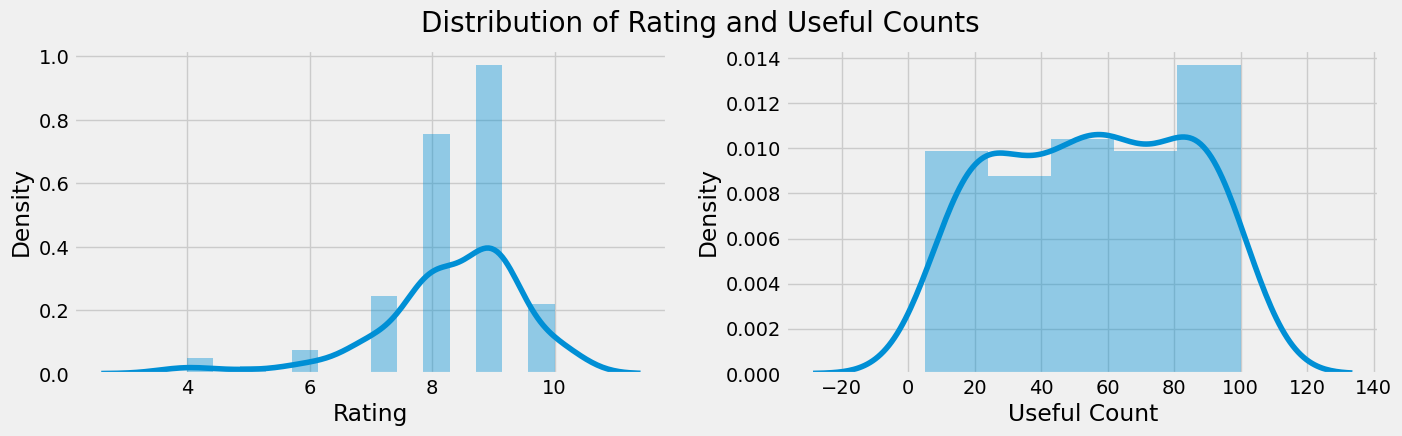

In [28]:
# lets check the Distribution of Rating and Useful Count

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.distplot(data['Rating'])

plt.subplot(1, 2, 2)
sns.distplot(data['Useful Count'])

plt.suptitle('Distribution of Rating and Useful Counts \n ', fontsize = 20)
plt.show()

In [ ]:
# for using Sentiment Analyzer we will have to dowload the Vader Lexicon from NLTK

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# lets calculate the Sentiment from Reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

train_sentiments = []

for i in data['Review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))

train_sentiments = np.asarray(train_sentiments)
data['sentiment'] = pd.Series(data=train_sentiments)

In [ ]:
# lets check Impact of Sentiment on Reviews
data[['Rating','sentiment']].groupby(['Rating']).agg(['min','mean','max'])

sentiment                  
             min      mean     max
Rating                            
4         0.9168  0.923350  0.9299
5         0.9501  0.950100  0.9501
6        -0.2023  0.520600  0.9019
7        -0.5063  0.679200  0.9709
8        -0.7817  0.688819  0.9710
9        -0.5423  0.690565  0.9774
10        0.7902  0.900789  0.9633

**Calculating Effectiveness and Usefulness of Remedis**

In [ ]:
# Lets Calculate an Effective Rating

min_rating = data['Rating'].min()
max_rating = data['Rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating *= 5
    rating = int(round(rating,0))

    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1

data['eff_score'] = data['Rating'].apply(scale_rating)

differnt format

In [ ]:
min_rating = data['Rating'].min()
max_rating = data['Rating'].max()

def scale_rating(rating):
    scaled_rating = (rating - min_rating) / (max_rating - min_rating + 1) * 5
    scaled_rating = round(scaled_rating)
    return 0 if scaled_rating <= 2 else 1

data['eff_score'] = data['Rating'].apply(scale_rating)


In [ ]:
# lets also calculate Usefulness Score

data['usefulness'] = data['Rating']*data['Useful Count']*data['eff_score']

# lets check the Top 10 Most Useful Drugs with their Respective Diseases Name	s
data[['Remedi Name ', 'Diseases Name','usefulness']][data['usefulness'] >
                            data['usefulness'].mean()].sort_values(by = 'usefulness',
                                        ascending = False).head(10).reset_index(drop = True)

,Remedi Name,Diseases Name,usefulness
0,Tulsi (Holy Basil),Common Cold,1000
1,Brahmi (Waterhyssop),Tuberculosis,1000
2,Liv.52,Hepatitis C,960
3,Tulsi,Chicken Pox,910
4,Arogyavardhini Vati,Hepatitis D,900
5,Grapefruit,Malaria,900
6,Aloe Vera,GERD,900
7,Amla,Diabeties,900
8,Ginger,Common Cold,882
9,Banana,Typhoid,880


Finding Most Useful and Useless Drugs for each Diseases Name

In [8]:
import pandas as pd


# Load the dataset
data = pd.read_csv('static/datasets/review.csv')

# Function to recommend medicine for given diseases
def recommend_medicine(diseases):
    recommended_medicines = {}
    for disease in diseases:
        # Filter dataset based on the disease
        filtered_data = data[data['Diseases Name'] == disease]

        # Sort filtered data by rating and useful count
        sorted_data = filtered_data.sort_values(by=['Rating', 'Useful Count'], ascending=False)

        # Get the top medicine for the disease
        top_medicine = sorted_data.iloc[0] if len(sorted_data) > 0 else None

        # Store the top medicine along with other remedies
        recommended_medicines[disease] = {
            'Top Medicine': top_medicine['Remedi Name '] if top_medicine is not None else None,
            'Other Remedies': sorted_data['Remedi Name '].tolist()[1:]
        }

    return recommended_medicines

# Example diseases
user_diseases = input("Enter your Disease.......")
#['fungal infections', 'Diabeties']
# Recommend medicines for given diseases
recommendations = recommend_medicine(user_diseases)

# Display recommendations
for disease, medicines in recommendations.items():
    print(f"For {disease}:")
    print(f"Most used Medicine: {medicines['Top Medicine']}")
    print(f"Other Remedies: {', '.join(medicines['Other Remedies'])}")
    print()


For f:
Most used Medicine: None
Other Remedies: 

For u:
Most used Medicine: None
Other Remedies: 

For n:
Most used Medicine: None
Other Remedies: 

For g:
Most used Medicine: None
Other Remedies: 

For a:
Most used Medicine: None
Other Remedies: 

For l:
Most used Medicine: None
Other Remedies: 

For  :
Most used Medicine: None
Other Remedies: 

For i:
Most used Medicine: None
Other Remedies: 

For e:
Most used Medicine: None
Other Remedies: 

For c:
Most used Medicine: None
Other Remedies: 

For t:
Most used Medicine: None
Other Remedies: 

For o:
Most used Medicine: None
Other Remedies: 

For s:
Most used Medicine: None
Other Remedies: 



In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv('static/datasets/review.csv')

# Function to recommend medicine for given diseases
def recommend_medicine(diseases):
    recommended_medicines = {}
    for disease in diseases:
        # Filter dataset based on the disease
        filtered_data = data[data['Diseases Name'] == disease]

        # Sort filtered data by rating and useful count
        sorted_data = filtered_data.sort_values(by=['Rating', 'Useful Count'], ascending=False)

        # Get the top medicine for the disease
        top_medicine = sorted_data.iloc[0] if len(sorted_data) > 0 else None

        # Store the top medicine along with other remedies
        recommended_medicines[disease] = {
            'Top Medicine': top_medicine['Remedi Name '] if top_medicine is not None else None,
            'Other Remedies': sorted_data['Remedi Name '].tolist()[1:]
        }

    return recommended_medicines

# Example diseases
user_diseases = input("Enter your Disease separated by commas: ")
# Example input: fungal infections,Diabetes

# Split the input string into a list of diseases
user_diseases = [disease.strip() for disease in user_diseases.split(',')]

# Recommend medicines for given diseases
recommendations = recommend_medicine(user_diseases)

# Display recommendations
for disease, medicines in recommendations.items():
    print(f"For {disease}:")
    print(f"Most used Medicine: {medicines['Top Medicine']}")
    print(f"Other Remedies: {', '.join(medicines['Other Remedies'])}")
    print()


For fungal infections:
Most used Medicine: Turmeric
Other Remedies: Neem Oil, Oregano Oil, Tea Tree Oil

For Diabetes:
Most used Medicine: None
Other Remedies: 

